# Лабораторная работа 5

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, r2_score, davies_bouldin_score, adjusted_rand_score

X, y = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=1000)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


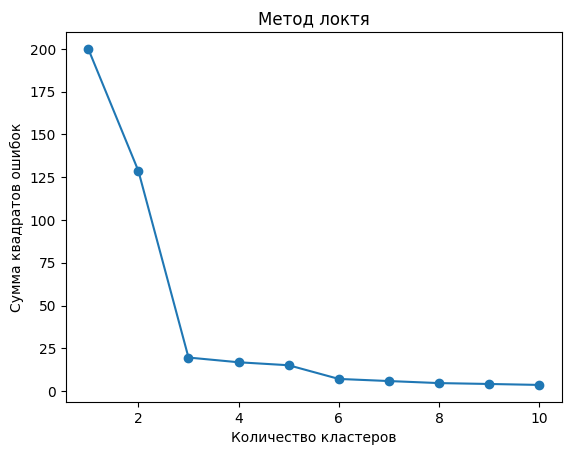

In [ ]:
# кластеризация K-MEANs
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1000)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Метод локтя')
plt.show()


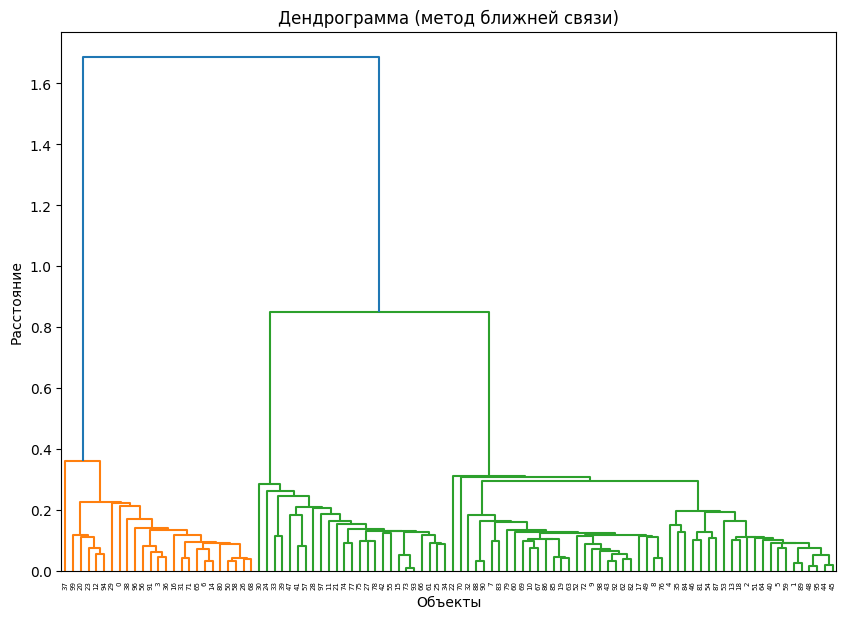

In [ ]:
# Иерархическая агломеративная кластеризация (метод ближней связи)
Z = linkage(X_scaled, method='single')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма (метод ближней связи)')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

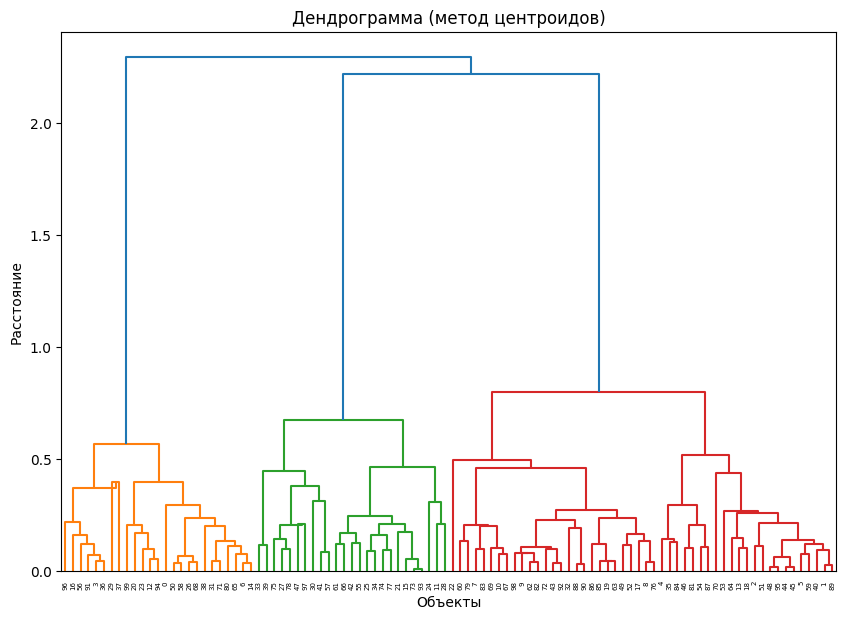

In [ ]:
# Иерархическая агломеративная кластеризация (метод центроидов)
Z_centroid = linkage(X_scaled, method='centroid')

# Строим дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(Z_centroid)
plt.title('Дендрограмма (метод центроидов)')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()


In [ ]:
# Сравнение

def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette, davies_bouldin

best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=1000)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_kmeans, davies_bouldin_kmeans = evaluate_clustering(X_scaled, kmeans_labels)

from sklearn.cluster import AgglomerativeClustering

agg_clust_single = AgglomerativeClustering(n_clusters=best_k, linkage='single')
agg_labels_single = agg_clust_single.fit_predict(X_scaled)

silhouette_single, davies_bouldin_single = evaluate_clustering(X_scaled, agg_labels_single)

agg_clust_centroid = AgglomerativeClustering(n_clusters=best_k, linkage='average')
agg_labels_centroid = agg_clust_centroid.fit_predict(X_scaled)

silhouette_centroid, davies_bouldin_centroid = evaluate_clustering(X_scaled, agg_labels_centroid)

print(f"KMeans: Silhouette = {silhouette_kmeans:.4f}, Davies-Bouldin = {davies_bouldin_kmeans:.4f}")
print(f"Agglomerative (Single Linkage): Silhouette = {silhouette_single:.4f}, Davies-Bouldin = {davies_bouldin_single:.4f}")
print(f"Agglomerative (Centroid Linkage): Silhouette = {silhouette_centroid:.4f}, Davies-Bouldin = {davies_bouldin_centroid:.4f}")


KMeans: Silhouette = 0.6552, Davies-Bouldin = 0.5232
Agglomerative (Single Linkage): Silhouette = 0.6362, Davies-Bouldin = 0.3669
Agglomerative (Centroid Linkage): Silhouette = 0.6576, Davies-Bouldin = 0.4618


In [ ]:
from sklearn.metrics import adjusted_rand_score

rand_kmeans_single = adjusted_rand_score(kmeans_labels, agg_labels_single)
rand_kmeans_centroid = adjusted_rand_score(kmeans_labels, agg_labels_centroid)
rand_single_centroid = adjusted_rand_score(agg_labels_single, agg_labels_centroid)

print(f"Rand Index (KMeans vs Agglomerative Single): {rand_kmeans_single:.4f}")
print(f"Rand Index (KMeans vs Agglomerative Centroid): {rand_kmeans_centroid:.4f}")
print(f"Rand Index (Agglomerative Single vs Agglomerative Centroid): {rand_single_centroid:.4f}")


Rand Index (KMeans vs Agglomerative Single): 0.9211
Rand Index (KMeans vs Agglomerative Centroid): 0.6242
Rand Index (Agglomerative Single vs Agglomerative Centroid): 0.6970


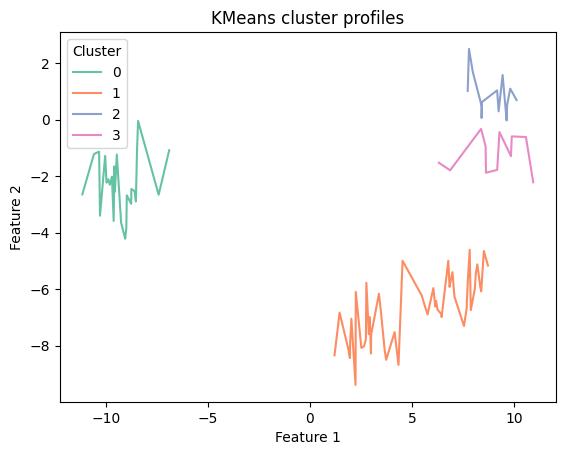

In [ ]:
import seaborn as sns

df_kmeans = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df_kmeans["Cluster"] = kmeans_labels
sns.lineplot(data=df_kmeans, x="Feature 1", y="Feature 2", hue="Cluster", palette="Set2")
plt.title("KMeans cluster profiles")
plt.show()


In [ ]:
cluster_means = df_kmeans.groupby("Cluster").mean()
print(cluster_means)

for cluster_id, mean_values in cluster_means.iterrows():
    print(f"Cluster {cluster_id}: Avg feature values - {mean_values.values}")

         Feature 1  Feature 2
Cluster                      
0        -9.296174  -2.303773
1         5.075675  -6.762436
2         8.883057   0.869992
3         8.967995  -1.217865
Cluster 0: Avg feature values - [-9.29617376 -2.30377338]
Cluster 1: Avg feature values - [ 5.07567464 -6.76243611]
Cluster 2: Avg feature values - [8.88305668 0.86999219]
Cluster 3: Avg feature values - [ 8.96799528 -1.21786521]
